# <p style="text-align: center;"><span style="text-decoration:underline;color:red">TP 2 : Support Vector Machines & Decision Trees</span></p>

Utiliser la fonction make_moons pour générer un jeu de données binaire contenant 1000 observations. Le séparer en deux (apprentissage et test).


## <span style="color:blue">SVM non linéaire à noyau gaussien</span>

#### 1. Analyser l’influence du paramètre de dispersion (spread) du noyau gaussien.


(1000, 2)


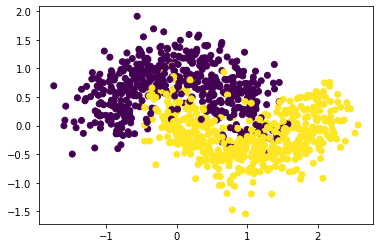

In [1]:
from sklearn.datasets import make_moons
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import LinearSVC

#on génère un jeu de données de 1000 observations
X,y = make_moons(n_samples=1000, shuffle=True, noise = 0.28)
print((X.shape)) #1000 données de 2 features

#on sépare nos données en entrainement/test
#70% training et 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#on visualise nos données 
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#les données sont bien non linéaires

#### On ajoute du bruit car si on ne le met pas ou si on le laisse à 0, les données sont trop bien séparées (même non linéairement). Il sera donc difficile pour un SVM non linaire de ne pas bien généraliser.

In [2]:
print(X)
print(y)

[[-0.41844906  1.17863288]
 [ 0.82566809 -0.37591651]
 [ 1.68706743 -0.43966847]
 ...
 [ 0.05710037 -0.0965999 ]
 [-1.08924623  0.90076859]
 [ 1.29043767 -0.78295909]]
[0 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0
 1 1 0 0 0 1 1 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 0 1
 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0
 0 1 0 1 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0
 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 0
 0 1 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1
 0 1 1 1 1 0 1 0 0 1 0 0 1 1 1 0 1 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 0 1 1 1 1
 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1
 1 1 1 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1
 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0
 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1
 1 0 0 

In [3]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

'''
#on normalise nos données => pas besoin ici
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.fit_transform(X_test)

'''

'\n#on normalise nos données => pas besoin ici\nscaler = StandardScaler()\nX_train_norm = scaler.fit_transform(X_train)\nX_test_norm = scaler.fit_transform(X_test)\n\n'

In [4]:
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

#créer une SVM avec un noyau gaussien de paramètre gamma=0.01 et C=10
classifier = svm.SVC(kernel='rbf', C=10, gamma=0.01)

#entraîner la SVM sur le jeu d'entraînement
classifier.fit(X_train, y_train)

#prédiction des labels pour les données de test
y_pred_test = classifier.predict(X_test)

#prédiction des labels pour les données d'apprentissage
y_pred_app = classifier.predict(X_train)

#erreur en apprentissage = 1 - accuracy
print("Accuracy:",metrics.accuracy_score(y_train, y_pred_app))
print("Erreur en apprentissage :",(1-(metrics.accuracy_score(y_train, y_pred_app))))

#erreur en test = 1 - accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_test))
print("Erreur en test :",(1-(metrics.accuracy_score(y_test, y_pred_test))))


Accuracy: 0.87
Erreur en apprentissage : 0.13
Accuracy: 0.86
Erreur en test : 0.14


Il y a  271 vecteurs supports.


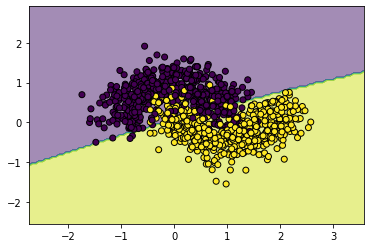

In [5]:
from sklearn.inspection import DecisionBoundaryDisplay

#on affiche le nombre de vecteurs supports
print("Il y a ",len(classifier.support_vectors_),"vecteurs supports.")

#on dessine les frontières de décision
disp = DecisionBoundaryDisplay.from_estimator(
    classifier, X, response_method="predict",
    alpha=0.5,
)
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
plt.show()

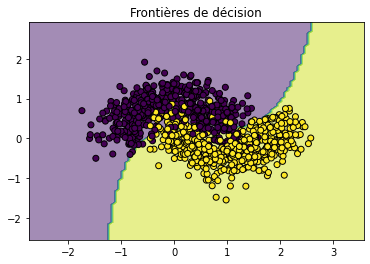

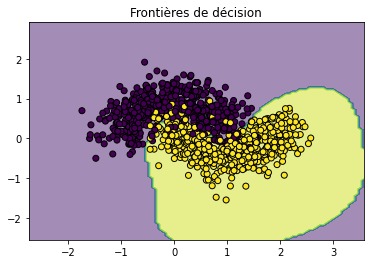

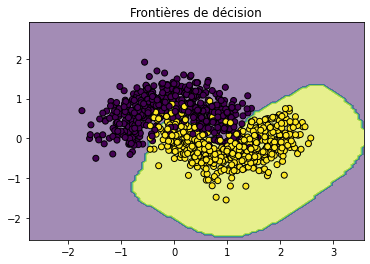

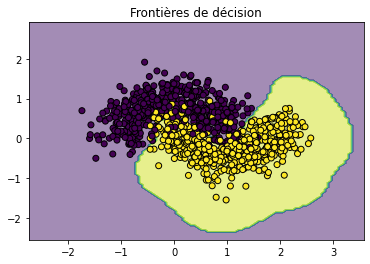

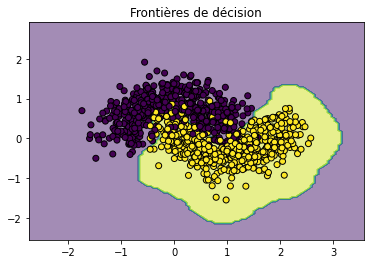

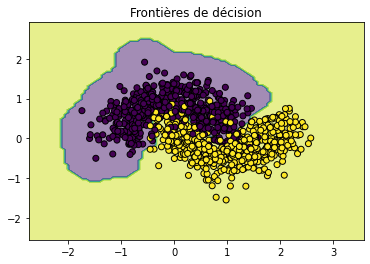

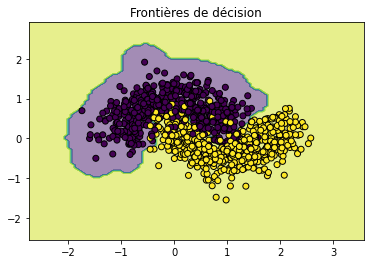

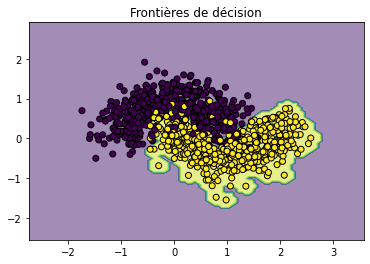

In [6]:
#on fait varier gamma et on note les erreurs/le nombre de vecteurs-supports/les frontières

gamma = [0.1, 1, 2, 5, 10, 15, 20, 100]
err_app = []
err_test = []
vect_supp = []

#on boucle sur les différentes valeurs de C
for i in gamma:
    model = svm.SVC(kernel='rbf', C=10, gamma=i) #on crée notre classifieur
    model.fit(X_train, y_train) #on entraine le modèle sur les données d'entrainement
    y_pred_app = model.predict(X_train) #prédiction des labels pour les données d'entrainement
    y_pred_test = model.predict(X_test) #prédiction des labels pour les données de test
    err_app.append(1-(metrics.accuracy_score(y_train, y_pred_app))) #calcul du taux d'erreur en apprentissage
    err_test.append(1-(metrics.accuracy_score(y_test, y_pred_test))) #calcul du taux d'erreur en test
    vect_supp.append(len(model.support_vectors_)) #vecteurs supports
    
    #affichage des frontières
    disp = DecisionBoundaryDisplay.from_estimator(model, X, response_method="predict",alpha=0.5)
    disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
    plt.title("Frontières de décision")
    plt.show()

In [7]:
#résultats selon gamma
df = pd.DataFrame(list(zip(gamma, err_app, err_test, vect_supp)), columns = ['Gamma','Erreur en training', 'Erreur en test', 'Nombre de Vecteurs-Supports'])
df

,Gamma,Erreur en training,Erreur en test,Nombre de Vecteurs-Supports
0,0.1,0.097143,0.103333,230
1,1.0,0.077143,0.086667,146
2,2.0,0.074286,0.080000,149
3,5.0,0.080000,0.086667,158
4,10.0,0.071429,0.083333,196
5,15.0,0.068571,0.086667,227
6,20.0,0.067143,0.096667,254
7,100.0,0.022857,0.130000,463


Le paramètre C de la classe SVC est le paramètre qui régit le degré de souplesse d'une marge. Par défaut, il a une valeur de 1. En général, les valeurs peuvent être considérées comme suit :

- Plus la valeur de C est petite, plus les marges sont larges - ce qui peut conduire à plus de mauvaises classifications.
- Inversement, plus la valeur de C est grande, plus les marges du classificateur sont étroites - ce qui peut conduire à moins d'erreurs de classification.

Gamma définit dans quelle mesure le modèle s'adaptera aux données d'apprentissage, ce qui permet d'éviter l'overfitting.
Le gamma définit la portée de l'influence d'un seul exemple de formation. Plus la valeur est faible, plus la portée d'un point de formation est grande. Inversement, plus la valeur est grande, plus la portée du point de formation est faible.

En raison de cette relation inverse, nous pouvons dire que l'utilisation d'un gamma plus petit peut signifier qu'un modèle est plus généralisé. Inversement, plus la valeur de gamma est grande, plus le modèle risque d'être surajusté aux données d'apprentissage.

Plus gamma augmente, plus on passe en surapprentissage donc erreur en training tend vers 0 et l'erreur en test est sensé décoller...

#### 2. Optimisation par recherche en grille (grid search)

Nous allons ici utiliser une validation croisée sur le jeu d'entraînement pour sélectionner les valeurs optimales de C et de gamma parmi une grille de valeurs.
On a vu précédemment que les valeurs optimales de gamma oscillent entre 1 et 10.

In [8]:
from sklearn.model_selection import GridSearchCV

#on choisit des valeurs pour C
val_C = [1, 5, 10, 15, 20, 50, 100]

#on choisit des valeurs pour gamma
val_gamma = [0.01, 0.05, 0.1, 0.5, 1, 2, 3, 5, 6, 7, 8, 10, 12]

#grille de paramètres
param_grid = {'C': val_C, 'gamma': val_gamma}

#initialiser une recherche sur grille
grid = GridSearchCV(svm.SVC(kernel='rbf'), 
                                    param_grid, 
                                    cv=5, # 5 folds de validation croisée  
                                    verbose=1)

#faire tourner la recherche sur grille
grid.fit(X_train, y_train)

#afficher les paramètres optimaux
print(grid.best_params_)

Fitting 5 folds for each of 91 candidates, totalling 455 fits
{'C': 5, 'gamma': 1}


Les paramètres optimaux sont :
- C = 1
- Gamma = 2

Etudions les performances de ce modèle.

Accuracy en apprentissage: 0.8657142857142858
Erreur en apprentissage : 0.13428571428571423
Accuracy en test: 0.87
Erreur en test : 0.13
Il y a  176 vecteurs supports.
Temps d'exécution/d'inférence :  8.987903594970703e-06
Temps d'apprentissage :  9.974002838134766e-06


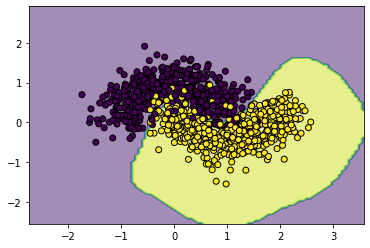

In [57]:
import time

#on crée notre modèle
model = svm.SVC(kernel='rbf', C=1, gamma=2)

t2 = time.time()
#entraîner la SVM sur le jeu d'entraînement
model.fit(X_train, y_train)
t3 = time.time()

t0 = time.time()
#prédiction des labels pour les données de test
predictions_test = classifier.predict(X_test)
t1 = time.time()

#prédiction des labels pour les données d'apprentissage
predictions_app = classifier.predict(X_train)

#erreur en apprentissage = 1 - accuracy
print("Accuracy en apprentissage:",metrics.accuracy_score(y_train, predictions_app))
print("Erreur en apprentissage :",(1-(metrics.accuracy_score(y_train, predictions_app))))

#erreur en test = 1 - accuracy
print("Accuracy en test:",metrics.accuracy_score(y_test, predictions_test))
print("Erreur en test :",(1-(metrics.accuracy_score(y_test, predictions_test))))

#on affiche le nombre de vecteurs supports
print("Il y a ",len(model.support_vectors_),"vecteurs supports.")

#on affiche le temps d'inférence
total1 = (t3-t2)/len(X)
total = (t1-t0)/len(X)
print("Temps d'exécution/d'inférence : ", total)
print("Temps d'apprentissage : ", total1)

#on dessine les frontières de décision
disp = DecisionBoundaryDisplay.from_estimator(
    model, X, response_method="predict",
    alpha=0.5)
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
plt.show()

#### vecteurs-supports = ce sont les points les plus proches de la séparatrice

Il ne faut pas qu'il y ait trop de vecteurs-supports sinon cela voudrait dire que un trop grand nombre de points sont proches des frontières, ce qui peut mener à une mauvaise généralisation.

#### Temps d'inférence ?

## <span style="color:blue">Decision Trees</span>

Fonctionnement :

L'arbre de décision est un diagramme de flux, et peut vous aider à prendre des décisions sur la base d'expériences antérieures.

Dans cet exemple, une personne va essayer de décider si elle doit aller à un spectacle de comédie ou non.

Heureusement, la personne de notre exemple s'est inscrite à chaque fois qu'un spectacle comique a eu lieu en ville, a enregistré des informations sur le comédien et a également enregistré si elle y est allée ou non.
Maintenant, sur la base de cet ensemble de données, Python peut créer un arbre de décision qui peut être utilisé pour décider si de nouveaux spectacles valent la peine d'être vus.

<img src="exemple.png" style="width:500px;height:300px;"/>


- toutes les variables doivent être numériques
- séparer features et target
- il faut normalement rechercher un attribut discriminant et lui attribuer un seuil
- Noeur pur => une classe contient tous les samples // les autres à 0
- Si le noeud terminal est pur => STOP, sinon on passe au noeud 2 avec un second attribut discriminant et son seuil (le choix se fait selon le critère de Gini/Entropie/Gain d'information).
- Un noeud est terminal si tous les éléments associés à ce nœud appartiennent à une même classe

Pour éviter le sur-apprentissage, on contrôle la profondeur et l'entropie.

#### 1.  Définir un arbre de décision en utilisant comme critère l’entropie (criterion=’entropy’) et l’entrainer. Analyser l’influence des paramètres suivants sur les performances en apprentissage, en test et sur les frontières de décision.

- Faire varier max_depth et noter les performances
- Faire varier min_samples_split et noter les performances
- Conclure


Accuracy en apprentissage : 0.8885714285714286
Erreur en apprentissage : 0.11142857142857143
Accuracy en test : 0.8733333333333333
Erreur en test : 0.1266666666666667


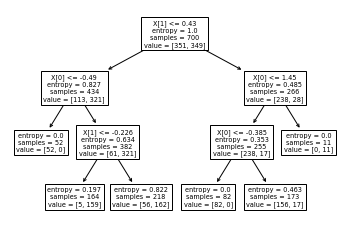

In [10]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

#on sépare nos données en entrainement/test
#70% training et 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#on crée notre arbre de décision
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=3)

#on entraine nos données
decision_tree.fit(X_train, y_train)

#on dessine l'arbre
tree.plot_tree(decision_tree)

#prédiction des labels pour les données de test
pred_test = decision_tree.predict(X_test)

#prédiction des labels pour les données d'apprentissage
pred_app = decision_tree.predict(X_train)

#erreur en apprentissage = 1 - accuracy
print("Accuracy en apprentissage :",metrics.accuracy_score(y_train, pred_app))
print("Erreur en apprentissage :",(1-(metrics.accuracy_score(y_train, pred_app))))

#erreur en test = 1 - accuracy
print("Accuracy en test :",metrics.accuracy_score(y_test, pred_test))
print("Erreur en test :",(1-(metrics.accuracy_score(y_test, pred_test))))

- max_depth : la profondeur maximale de l'arbre. Si None, les noeuds sont développés jusqu'à ce que toutes les feuilles soient pures ou jusqu'à ce que toutes les feuilles contiennent moins de min_samples_split échantillon


- min_samples_split : le nombre minimum d'échantillons requis pour diviser un noeud interne


- Entropie = caractérise le degré de désorganisation, ou d'imprédictibilité, du contenu en information d'un système. Si on continue jusqu'à une entropie à 0 (cf. arbre complet) on est en sur-apprentissage. On va donc prendre des critères d'arrêt lors de l'apprentissage comme une entropie à une valeur minimum.

La "maximum tree depth" qui signifie profondeur maximale de l'arbre, il s'agit d'arrêter le développement de l'arbre une fois qu'il a atteint une certaine profondeur, cela  évitera que l'arbre construise des branches avec trop peu d'exemples et donc permettra d'éviter un sur apprentissage.

Le "minimum sample split" ou encore nombre d'exemples minimum pour un split consiste à ne pas splitter une branche si la décision concerne trop peu d'exemples. Cela permet également d'empêcher le surapprentissage.

In [24]:
#on fait varier max-depth et min_samples_split
max_depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30]
tx_err_app = []
tx_err_test = []

#on commence par faire varier max_depth pour observer son influence
for i in max_depth:
    model = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    model.fit(X_train, y_train) #on entraine le modèle sur les données d'entrainement
    y_pred_app = model.predict(X_train) #prédiction des labels pour les données d'entrainement
    y_pred_test = model.predict(X_test) #prédiction des labels pour les données de test
    tx_err_app.append(1-(metrics.accuracy_score(y_train, y_pred_app))) #calcul du taux d'erreur en apprentissage
    tx_err_test.append(1-(metrics.accuracy_score(y_test, y_pred_test))) #calcul du taux d'erreur en test
    

In [25]:
df = pd.DataFrame(list(zip(max_depth, tx_err_app, tx_err_test)), columns = ['max_depth','Erreur en training', 'Erreur en test'])
df

,max_depth,Erreur en training,Erreur en test
0,1,0.201429,0.190000
1,2,0.111429,0.126667
2,3,0.111429,0.126667
3,4,0.111429,0.126667
4,5,0.104286,0.116667
5,6,0.075714,0.096667
6,7,0.060000,0.106667
7,8,0.047143,0.120000
8,9,0.040000,0.123333
9,10,0.030000,0.123333


In [40]:
#on fait varier min_sample maintenant pour observer son influence

min_sample = [2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30]
tx_err_app2 = []
tx_err_test2 = []

for j in min_sample:
    model = DecisionTreeClassifier(criterion='entropy', min_samples_split=j) #max_depth=None par defaut
    model.fit(X_train, y_train) #on entraine le modèle sur les données d'entrainement
    y_pred_app2 = model.predict(X_train) #prédiction des labels pour les données d'entrainement
    y_pred_test2 = model.predict(X_test) #prédiction des labels pour les données de test
    tx_err_app2.append(1-(metrics.accuracy_score(y_train, y_pred_app2))) #calcul du taux d'erreur en apprentissage
    tx_err_test2.append(1-(metrics.accuracy_score(y_test, y_pred_test2))) #calcul du taux d'erreur en test

In [41]:
df = pd.DataFrame(list(zip(min_sample, tx_err_app2, tx_err_test2)), columns = ['min_sample','Erreur en training', 'Erreur en test'])
df

,min_sample,Erreur en training,Erreur en test
0,2,0.000000,0.133333
1,3,0.005714,0.136667
2,4,0.008571,0.136667
3,5,0.011429,0.140000
4,6,0.017143,0.126667
5,7,0.022857,0.130000
6,8,0.028571,0.133333
7,9,0.031429,0.136667
8,10,0.037143,0.126667
9,20,0.051429,0.113333


In [29]:
from sklearn.model_selection import GridSearchCV

#on choisit des valeurs pour max_depth
max_depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30]

#on choisit des valeurs pour min_sample
min_sample = [2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30]

#grille de paramètres
param_grid = {'max_depth': max_depth, 'min_samples_split': min_sample}

#initialiser une recherche sur grille
grid_tree = GridSearchCV(DecisionTreeClassifier(criterion='entropy'), 
                                    param_grid, 
                                    cv=5, # 5 folds de validation croisée  
                                    verbose=1)

#faire tourner la recherche sur grille
grid_tree.fit(X_train, y_train)

#afficher les paramètres optimaux
print(grid_tree.best_params_)

Fitting 5 folds for each of 132 candidates, totalling 660 fits
{'max_depth': 6, 'min_samples_split': 20}


Les paramètres optimaux sont :
- max_depth = 6
- min_samples_split = 20

Etudions les performances de ce modèle.

Temps d'apprentissage :  2.994537353515625e-06
Accuracy en apprentissage: 0.92
Erreur en apprentissage : 0.07999999999999996
Accuracy en test: 0.9133333333333333
Erreur en test : 0.08666666666666667


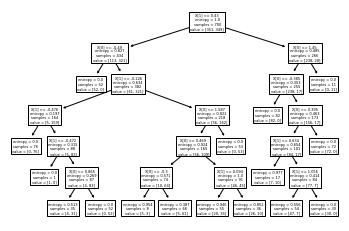

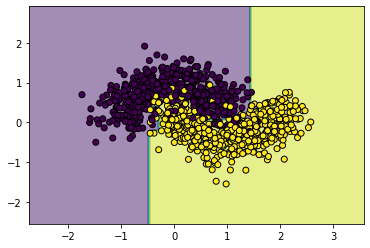

In [62]:
#on crée notre arbre de décision OPTIMAL
model_tree = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=20)

#on entraine nos données et on mesure le temps d'apprentissage
t0 = time.time()
model_tree.fit(X_train, y_train)
t1 = time.time()

#on dessine l'arbre
tree.plot_tree(model_tree)

#prédiction des labels pour les données de test
predtree_test = model_tree.predict(X_test)

#prédiction des labels pour les données d'apprentissage
predtree_app = model_tree.predict(X_train)

#temps d'apprentissage
total = (t1-t0)/len(X)
print("Temps d'apprentissage : ", total)

#erreur en apprentissage = 1 - accuracy
print("Accuracy en apprentissage:",metrics.accuracy_score(y_train, predtree_app))
print("Erreur en apprentissage :",(1-(metrics.accuracy_score(y_train, predtree_app))))

#erreur en test = 1 - accuracy
print("Accuracy en test:",metrics.accuracy_score(y_test, predtree_test))
print("Erreur en test :",(1-(metrics.accuracy_score(y_test, predtree_test))))

#on dessine les frontières de décision
disp = DecisionBoundaryDisplay.from_estimator(
    model_tree, X, response_method="predict",
    alpha=0.5)
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
plt.show()

## <span style="color:blue">Extra Trees</span>

#### 1.  Expliquer le principe et l’avantage des extra trees.

Les Extra-Trees divisent en choisissant des nœuds seuils entièrement au hasard.
Le principal avantage des arbres supplémentaires est la réduction du biais. Il s'agit de l'échantillonnage de l'ensemble des données pendant la construction des arbres. Différents sous-ensembles de données peuvent introduire différents biais dans les résultats obtenus. Extra Trees évite cela en échantillonnant l'ensemble des données.
Nous constatons que les ExtraTrees présentent un intérêt, notamment lorsque le coût de calcul est un problème. Plus précisément, lorsque l'on construit des modèles qui comportent des étapes importantes de pré-modélisation d'ingénierie et de sélection de caractéristiques, et que le coût de calcul est un problème, ExtraTrees serait un bon choix par rapport à d'autres modèles basés sur des arbres d'ensemble.


===> imaginons que l'on a un dataset de 1000 descripteurs, c'est compliqué/long de trouver le meilleur descripteur avec le meilleur seuil 

#### 2.   Lancer 20 fois l’apprentissage d’un unique extra tree (ExtraTreesClassifier) en utilisant le paramètre splitter=’random’. Afficher les performances en apprentissage et en test en utilisant une boîte à moustache. Commenter ces résultats.

In [67]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import ExtraTreeClassifier

#on a déjà nos données brutes, d'apprentissage et de test
perf_app = []
perf_test = []
liste = [i for i in range(1,20+1)]
temps_app = []

for i in liste:
    #on crée notre classifieur ExtraTrees
    extra_trees = ExtraTreeClassifier(splitter='random')
    
    #on mesure le temps d'apprentissage
    #on entraine le modèle
    t0 = time.time()
    extra_trees.fit(X_train, y_train)
    t1 = time.time()
    
    #temps d'apprentissage
    temps_app.append((t1-t0)/len(X))
    
    #prédiction des labels pour les données de test
    predXtratree_test = extra_trees.predict(X_test)
    #prédiction des labels pour les données d'apprentissage
    predXtratree_app = extra_trees.predict(X_train)
    
    #on note nos scoring
    perf_app.append(extra_trees.score(X_train, y_train))
    perf_test.append(extra_trees.score(X_test, y_test))

In [68]:
df = pd.DataFrame(list(zip(liste, perf_app, perf_test, temps_app)), columns = ['Itération','Performance en training', 'Performance en test', "Temps d'apprentissage"])
df

,Itération,Performance en training,Performance en test,Temps d'apprentissage
0,1,1.0,0.886667,3.984928e-06
1,2,1.0,0.856667,2.990961e-06
2,3,1.0,0.823333,1.994133e-06
3,4,1.0,0.823333,2.002478e-06
4,5,1.0,0.840000,1.990080e-06
5,6,1.0,0.863333,1.994610e-06
6,7,1.0,0.846667,1.998425e-06
7,8,1.0,0.860000,1.988649e-06
8,9,1.0,0.870000,1.991749e-06
9,10,1.0,0.830000,1.036167e-06


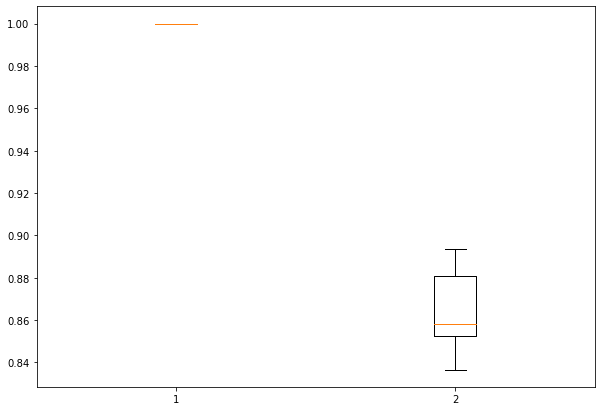

In [35]:
import matplotlib.pyplot as plt
import numpy as np


df2 = pd.DataFrame(list(zip(perf_app, perf_test)), columns = ['Erreur en training', 'Erreur en test'])

fig = plt.figure(figsize =(10, 7))
 
#boite à moustache
plt.boxplot(df2)
plt.show()

Si on interprète les boxplot :
- erreur en training : maximum, 3ème quartile, médiane, 1er quartile et la minimum sont à 1 => on a une seule droite à une accuracy de 1
- erreur en test : 
        maximum : environ 0.9 
        3ème quartile : environ 0.88
        Médiane : environ 0.86
        1er quartile : environ 0.85
        minimum : environ 0.83

In [51]:
print(df2["Erreur en test"].min())
print(df2["Erreur en test"].max())
print(df2["Erreur en test"].median())
print(np.quantile(df2["Erreur en test"], 0.25)) #1er quantile
print(np.quantile(df2["Erreur en test"], 0.75)) #3eme quantile

0.8366666666666667
0.8933333333333333
0.8583333333333334
0.8525
0.8808333333333334


#### 4.  Lancer l’apprentissage avec 10, puis 20 puis 50 extra-trees. Comment est réalisée la combinaison de leur prédiction ? Rassembler les performances en apprentissage, en test dans un tableau. Comparer le modèle optimal avec celui trouvé en 2).

In [63]:
from sklearn.ensemble import ExtraTreesClassifier
import time

total = t1-t0

precisionTrain = []
precisionTest = []
nbr_arbre = []
tps_apprentissage = []

for i in ([1, 10, 20, 50]):
    clf = ExtraTreesClassifier(n_estimators=i)#, splitter='random')
    
    t0 = time.time()
    clf.fit(X_train, y_train)
    t1 = time.time()
    
    predictTrain = clf.predict(X_train)
    predictTest = clf.predict(X_test)
    predictionTrain = metrics.accuracy_score(predictTrain, y_train)
    predictionTest = metrics.accuracy_score(predictTest, y_test)
    precisionTrain.append(predictionTrain)
    precisionTest.append(predictionTest)
    tps_apprentissage.append((t1-t0)/len(X))

    nbr_arbre.append(i)
    
colonnes = ["Nombre d'arbres", "Précision Train", "Précision Test"]
df = pd.DataFrame(columns=colonnes)
df["Nombre d'arbres"] = nbr_arbre
df["Précision Train"] = precisionTrain
df["Précision Test"] = precisionTest
df["Temps d'apprentissage"] = tps_apprentissage
df

,Nombre d'arbres,Précision Train,Précision Test,Temps d'apprentissage
0,1,1.0,0.843333,0.000003
1,10,1.0,0.900000,0.000014
2,20,1.0,0.893333,0.000024
3,50,1.0,0.893333,0.000052


On peut comparer le temps d'apprentissage et en combinant cela à la précision, on peut jauger si notre arbre de décision optimal ou nos extratrees sont les plus performants.

- Pour les Extra-Trees lancé en même temps : la performance en test la plus intéressante est celle de 10 Extra-Trees avec un score de 90%. Le temps d'apprentissage associé est 0.000014.
- Pour notre Extra-Trees lancé 20 fois : au bout de la 15ème fois, la performance en test la plus intéressante est à 90%. Le temps d'apprentissage associé est 9.663105e-07.

#### Nous pouvons donc conclure qu'il est plus intéressant d'utiliser une combinaison d'ExtraTrees plutot que de lancer plusieurs fois un même ExtraFees (temps d'apprentissage moins long).
Pour des différences plus probantes, nous pourrions tester avec un dataset beaucoup plus large que nos 1000 données de base.

In [ ]:
#sur le anaconda prompt, taper :
#jupyter-nbconvert --to PDFviaHTML TP2_MADAD_NOUAR_BERNARDOU.ipynb